In [44]:
! pip install python-docx

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import docx
from docx import Document

In [46]:
data = pd.read_excel(r'C:\Users\HUAWEI\Desktop\data_articles.xlsx')
data.head()

,Кафедра,ФИО автора,Категория автора (студент/преподаватель),ФИО соавтора (если имеется),Категория соавтора (студент/преподаватель),Название статьи,Название журнала,год публикации,база цитирования,в рамках гранта (да/нет)
0,МОГУ,ФИО автора,преподаватель,ФИО соавтора,преподаватель,Название статьи,Журнал1,2019,ВАК,нет
1,МОГУ,ФИО автора,студент,ФИО соавтора,студент,Название статьи,Журнал2,2019,РИНЦ,нет
2,МОГУ,ФИО автора,преподаватель,ФИО соавтора,студент,Название статьи,Журнал3,2020,ВАК,да
3,ТДиМЭ,ФИО автора,преподаватель,ФИО соавтора,студент,Название статьи,Журнал4,2019,СКОПУС,нет
4,ТДиМЭ,ФИО автора,студент,нет,нет,Название статьи,Журнал5,2019,РИНЦ,нет


In [47]:
data.columns = ['Кафедра', 'ФИО_автора', 'Категория_автора',
       'ФИО_соавтора',
       'Категория_соавтора', 'Название_статьи',
       'Название_журнала', 'год_публикации', 'база_цитирования',
       'в_рамках_гранта']

Так как отчет делается за каждый год, отфильтруем данные по году формирования отчета

In [48]:
# Необходимо ввести год для которого формируется отчет
year = int(input())
year_before = year-1

In [49]:
# Отфильтруем данные по годам
data_year = data[data['год_публикации'] == year]
data_year_before = data[data['год_публикации'] == year_before]

Нам необходимо определить сколько статей написано с участием студентов (не важно в какой категории - автор или соавтор)

При расчете количества статей с участием преподавателей важно, чтобы он был автором, а не соавтором

In [50]:
def count_articles_total(data):
    # Количество статей, выполненных студентами, всего
    students_count_total = data.query('Категория_автора == "студент" | Категория_соавтора == "студент"')['Категория_автора'].count()
    # Количество статей, выполненных преподавателями, всего
    teacher_count_total = data.query('Категория_автора == "преподаватель"')['Категория_автора'].count()
    # Количество статей ВАК, всего
    vak_total = data.query('база_цитирования == "ВАК"')['база_цитирования'].count()
    # Количество статей ВАК, выполненных преподавателями, всего
    teacher_count_vak = data.query('Категория_автора == "преподаватель" & база_цитирования=="ВАК"')['Категория_автора'].count()
    # Количество статей ВАК, выполненных студентами, всего
    students_count_vak = data.query('(Категория_автора == "студент" | Категория_соавтора == "студент") & база_цитирования=="ВАК"')['Категория_автора'].count()
    # Количество статей РИНЦ, всего
    rinz_total = data.query('база_цитирования == "РИНЦ"')['база_цитирования'].count()
    # Количество статей РИНЦ, выполненных преподавателями, всего
    teacher_count_rinz = data.query('Категория_автора == "преподаватель" & база_цитирования=="РИНЦ"')['Категория_автора'].count()
    # Количество статей РИНЦ, выполненных студентами, всего
    students_count_rinz = data.query('(Категория_автора == "студент" | Категория_соавтора == "студент") & база_цитирования=="РИНЦ"')['Категория_автора'].count()
    # Количество статей СКОПУС, всего
    scopus_total = data.query('база_цитирования == "СКОПУС"')['база_цитирования'].count()
    # Количество статей СКОПУС, выполненных преподавателями, всего
    teacher_count_scopus = data.query('Категория_автора == "преподаватель" & база_цитирования=="СКОПУС"')['Категория_автора'].count()
    # Количество статей СКОПУС, выполненных студентами, всего
    students_count_scopus = data.query('(Категория_автора == "студент" | Категория_соавтора == "студент") & база_цитирования=="СКОПУС"')['Категория_автора'].count()
    # Количество статей в рамках гранта, всего
    grant_total = data.query('в_рамках_гранта == "да"')['в_рамках_гранта'].count()
    # Количество статей всего
    total_articles = data['Кафедра'].count()
    return students_count_total, teacher_count_total, vak_total, teacher_count_vak, students_count_vak, rinz_total, teacher_count_rinz, students_count_rinz, scopus_total, teacher_count_scopus, students_count_scopus, grant_total, total_articles

In [51]:
students_count_total, teacher_count_total, vak_total, teacher_count_vak, students_count_vak, rinz_total, teacher_count_rinz, students_count_rinz, scopus_total, teacher_count_scopus, students_count_scopus, grant_total, total_articles = count_articles_total(data_year)

Для отчета по каждой кафедре

In [52]:
# Функция для построения сводной таблицы по кафедрам
def count_articles_kafedra(data):

    kafedra = data['Кафедра'].unique()
    
    students_count_kaf = []
    teacher_count_kaf = []
    
    vak_kaf = []
    teacher_vak_kaf = []
    students_vak_kaf = []
    
    rinz_kaf = []
    teacher_rinz_kaf = []
    students_rinz_kaf = []

    scopus_kaf = []
    teacher_scopus_kaf = []
    students_scopus_kaf = []

    grant_kaf = []

    for i in kafedra:
        filtered_data = data.loc[data['Кафедра']==i]
        # Количество статей, выполненных студентами, по кафедре
        students_kaf = filtered_data.query('Категория_автора == "студент" | Категория_соавтора == "студент"')['Категория_автора'].count()
        students_count_kaf.append(students_kaf)
        # Количество статей, выполненных преподавателями, по кафедре
        teacher_kaf = filtered_data.query('Категория_автора == "преподаватель"')['Категория_автора'].count()
        teacher_count_kaf.append(teacher_kaf)
        
        # Количество статей ВАК, по кафедре
        vak_total_kaf = filtered_data.query('база_цитирования == "ВАК"')['база_цитирования'].count()
        vak_kaf.append(vak_total_kaf)
        # Количество статей ВАК, выполненных преподавателями, по кафедре
        teacher_count_vak_kaf = filtered_data.query('Категория_автора == "преподаватель" & база_цитирования=="ВАК"')['Категория_автора'].count()
        teacher_vak_kaf.append(teacher_count_vak_kaf)
        # Количество статей ВАК, выполненных студентами, по кафедре
        students_count_vak_kaf = filtered_data.query('(Категория_автора == "студент" | Категория_соавтора == "студент") & база_цитирования=="ВАК"')['Категория_автора'].count()
        students_vak_kaf.append(students_count_vak_kaf)

        # Количество статей РИНЦ, по кафедре
        rinz_total_kaf = filtered_data.query('база_цитирования == "РИНЦ"')['база_цитирования'].count()
        rinz_kaf.append(rinz_total_kaf)
        # Количество статей РИНЦ, выполненных преподавателями, по кафедре
        teacher_count_rinz_kaf = filtered_data.query('Категория_автора == "преподаватель" & база_цитирования=="РИНЦ"')['Категория_автора'].count()
        teacher_rinz_kaf.append(teacher_count_rinz_kaf)
        # Количество статей РИНЦ, выполненных студентами, по кафедре
        students_count_rinz_kaf = filtered_data.query('(Категория_автора == "студент" | Категория_соавтора == "студент") & база_цитирования=="РИНЦ"')['Категория_автора'].count()
        students_rinz_kaf.append(students_count_rinz_kaf)

        # Количество статей СКОПУС, по кафедре
        scopus_total_kaf = filtered_data.query('база_цитирования == "СКОПУС"')['база_цитирования'].count()
        scopus_kaf.append(scopus_total_kaf)
        # Количество статей СКОПУС, выполненных преподавателями, по кафедре
        teacher_count_scopus_kaf = filtered_data.query('Категория_автора == "преподаватель" & база_цитирования=="СКОПУС"')['Категория_автора'].count()
        teacher_scopus_kaf.append(teacher_count_scopus_kaf)
        # Количество статей СКОПУС, выполненных студентами, по кафедре
        students_count_scopus_kaf = filtered_data.query('(Категория_автора == "студент" | Категория_соавтора == "студент") & база_цитирования=="СКОПУС"')['Категория_автора'].count()
        students_scopus_kaf.append(students_count_scopus_kaf)

        # Количество статей в рамках гранта, всего
        grant_kaf_total = filtered_data.query('в_рамках_гранта == "да"')['в_рамках_гранта'].count()
        grant_kaf.append(grant_kaf_total)

    # Сводная таблица
    report_kaf_table = pd.DataFrame({
        'Кафедра': kafedra,
        'Количество статей с участием студентов': students_count_kaf,
        'Количество статей, написанных преподавателем': teacher_count_kaf,
        'Количество статей ВАК': vak_kaf,
        'Количество статей ВАК, написанных преподавателем': teacher_vak_kaf,
        'Количество статей ВАК, с участием студентов': students_vak_kaf,
        'Количество статей РИНЦ': rinz_kaf,
        'Количество статей РИНЦ, написанных преподавателем': teacher_rinz_kaf,
        'Количество статей РИНЦ, с участием студентов': students_rinz_kaf,
        'Количество статей СКОПУС': scopus_kaf,
        'Количество статей СКОПУС, написанных преподавателем': teacher_scopus_kaf,
        'Количество статей СКОПУС, с участием студентов': students_scopus_kaf,
        'Количество статей, выполненных в рамках гранта': grant_kaf
    })

    # Рассчитаем ИТОГО
    total_row = {
        'Кафедра': 'Итого',
        'Количество статей с участием студентов': sum(students_count_kaf),
        'Количество статей, написанных преподавателем': sum(teacher_count_kaf),
        'Количество статей ВАК': sum(vak_kaf),
        'Количество статей ВАК, написанных преподавателем': sum(teacher_vak_kaf),
        'Количество статей ВАК, с участием студентов': sum(students_vak_kaf),
        'Количество статей РИНЦ': sum(rinz_kaf),
        'Количество статей РИНЦ, написанных преподавателем': sum(teacher_rinz_kaf),
        'Количество статей РИНЦ, с участием студентов': sum(students_rinz_kaf),
        'Количество статей СКОПУС': sum(scopus_kaf),
        'Количество статей СКОПУС, написанных преподавателем': sum(teacher_scopus_kaf),
        'Количество статей СКОПУС, с участием студентов': sum(students_scopus_kaf),
        'Количество статей, выполненных в рамках гранта': sum(grant_kaf)
    }

    # Добавляем строку итогов в таблицу
    report_kaf_table = report_kaf_table.append(total_row, ignore_index=True)

    # Делаем столбец "Кафедра" индексом
    report_kaf_table = report_kaf_table.set_index('Кафедра')


    return kafedra, students_count_kaf, teacher_count_kaf, vak_kaf, teacher_vak_kaf, students_vak_kaf, rinz_kaf, teacher_rinz_kaf, students_rinz_kaf, scopus_kaf, teacher_scopus_kaf, students_scopus_kaf, grant_kaf, report_kaf_table

In [53]:
# Применим функцию для построения сводной таблицы для отчетного года
kafedra, students_count_kaf, teacher_count_kaf, vak_kaf, teacher_vak_kaf, students_vak_kaf, rinz_kaf, teacher_rinz_kaf, students_rinz_kaf, scopus_kaf, teacher_scopus_kaf, students_scopus_kaf, grant_kaf, report_kaf_table = count_articles_kafedra(data_year)

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_4552\366355118.py:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report_kaf_table = report_kaf_table.append(total_row, ignore_index=True)


In [54]:
report_kaf_table

,Количество статей с участием студентов,"Количество статей, написанных преподавателем",Количество статей ВАК,"Количество статей ВАК, написанных преподавателем","Количество статей ВАК, с участием студентов",Количество статей РИНЦ,"Количество статей РИНЦ, написанных преподавателем","Количество статей РИНЦ, с участием студентов",Количество статей СКОПУС,"Количество статей СКОПУС, написанных преподавателем","Количество статей СКОПУС, с участием студентов","Количество статей, выполненных в рамках гранта"
Кафедра,,,,,,,,,,,,
МОГУ,2,1,1,1,0,2,0,2,0,0,0,1
ТДиМЭ,4,3,0,0,0,3,1,2,2,2,2,0
ИТ,1,0,1,0,1,0,0,0,0,0,0,1
РЭМ,2,2,3,1,2,1,1,0,0,0,0,0
ОТиОС,0,3,2,2,0,1,1,0,0,0,0,0
Итого,9,9,7,4,3,7,3,4,2,2,2,2


Графическое представление данных

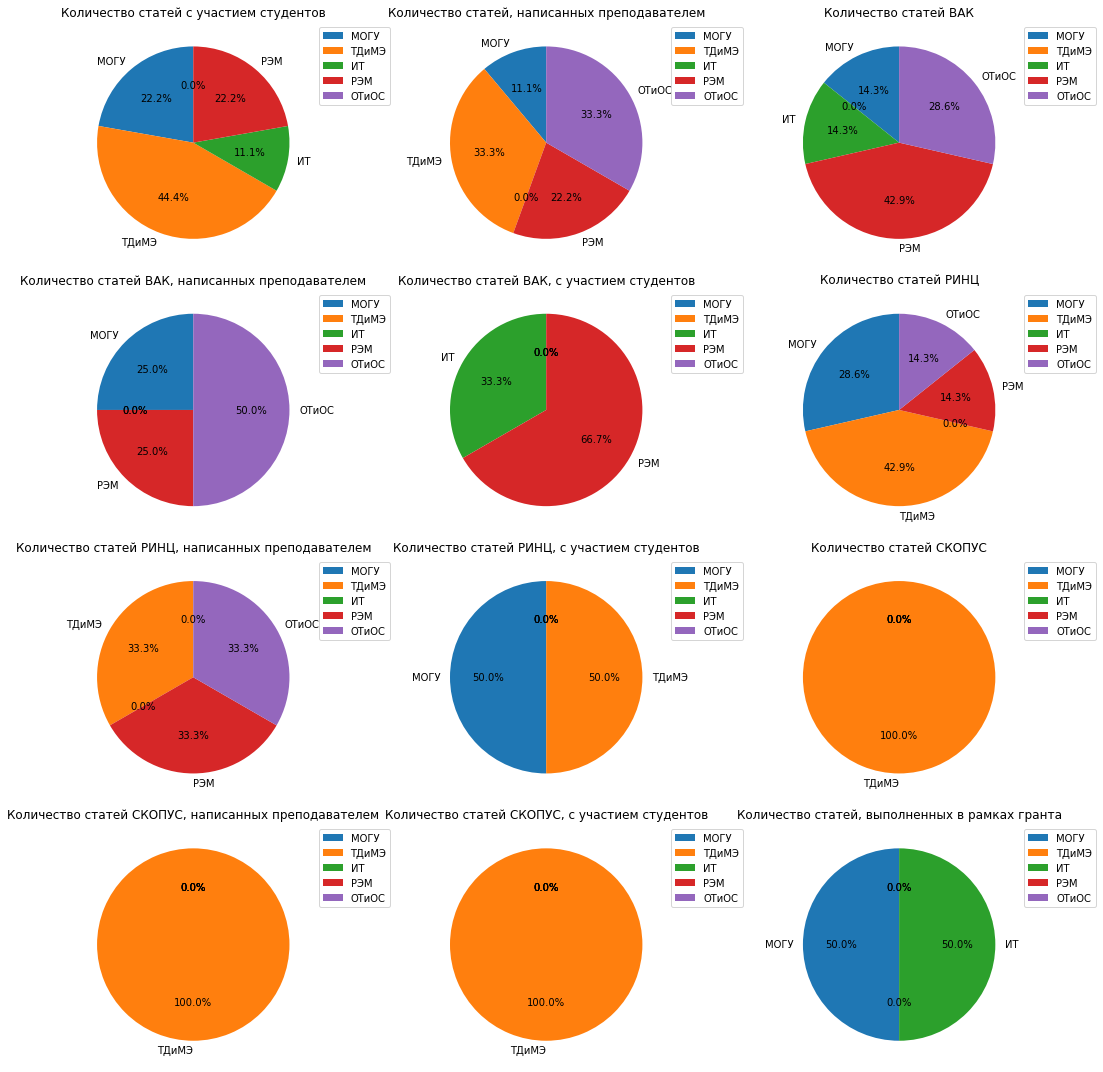

In [55]:
# Определение количества столбцов и строк для размещения диаграмм
num_columns = 3
num_rows = -(-len(report_kaf_table.columns) // num_columns)  # Округление вверх

# Создание подграфиков
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 15))

# Построение круговых диаграмм для каждого столбца
for idx, column in enumerate(report_kaf_table.columns):
    if not report_kaf_table[column].eq(0).all():  # Пропустить столбцы с нулевыми значениями
        row_idx = idx // num_columns
        col_idx = idx % num_columns
        ax = axes[row_idx, col_idx]
        report_kaf_table[column][:-1].plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax)  
        ax.set_title(f"{column}") 
        legend = ax.legend(report_kaf_table.index, loc="upper left")  # Изменено положение легенды
        legend.set_bbox_to_anchor((1, 1))  # Подвигаем легенду вправо и вверх
        ax.set_ylabel(None)  # Убрать подпись слева 

# Удаление лишних пустых подграфиков, если число столбцов не кратно 3
for idx in range(len(report_kaf_table.columns), num_rows * num_columns):
    fig.delaxes(axes.flatten()[idx])

# Сохранение графика как изображения (например, PNG)
fig.savefig("output_graph.png", bbox_inches="tight")


plt.tight_layout()
plt.show()

Добавление данных в документ-word

In [56]:
# Создаем новый документ
doc = Document()

# Добавляем заголовок
doc.add_heading(f"Сводный отчет о научно-исследовательской деятельности ВУЗа за {year} год", level=1)

# Добавляем пустую строку
doc.add_paragraph()

# Вставляем переменные в текст
doc.add_paragraph(f"Общее количество статей по всем кафедрам: {total_articles}")
doc.add_paragraph(f"Общее количество статей, написанных преподавателями: {teacher_count_total}")
doc.add_paragraph(f"Общее количество статей, с участием студентов: {students_count_total}")

# Добавляем пустую строку
doc.add_paragraph()

doc.add_paragraph(f"Общее количество статей в журналах РИНЦ: {rinz_total}")
doc.add_paragraph(f"Общее количество статей в журналах РИНЦ, с участием студентов: {students_count_rinz }")
doc.add_paragraph(f"Общее количество статей в журналах РИНЦ, написанных преподавателями: {teacher_count_rinz }")

# Добавляем пустую строку
doc.add_paragraph()

doc.add_paragraph(f"Общее количество статей в журналах ВАК: {vak_total}")
doc.add_paragraph(f"Общее количество статей в журналах ВАК, с участием студентов: {students_count_vak }")
doc.add_paragraph(f"Общее количество статей в журналах ВАК, написанных преподавателями: {teacher_count_vak}")

# Добавляем пустую строку
doc.add_paragraph()

doc.add_paragraph(f"Общее количество статей в журналах Scopus: {scopus_total}")
doc.add_paragraph(f"Общее количество статей в журналах Scopus, с участием студентов: {students_count_scopus }")
doc.add_paragraph(f"Общее количество статей в журналах Scopus, написанных преподавателями: {teacher_count_scopus}")

# Добавляем пустую строку
doc.add_paragraph()

doc.add_paragraph(f"Общее количество статей, выполненных в рамках грантов: {grant_total}")

# Добавляем пустую строку
doc.add_paragraph()

# Добавляем новый раздел (лист) 
section = doc.add_section()


# Добавляем заголовок
doc.add_heading('Сводный отчет о научно-исследовательской деятельности ВУЗа по кафедрам', level=1)

# Создаем таблицу
table = doc.add_table(rows=1, cols=13)
table.style = 'Table Grid'

# Добавляем заголовки столбцов
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Кафедра'
hdr_cells[1].text = 'Количество статей с участием студентов:'
hdr_cells[2].text = 'Количество статей, написанных преподавателем:'
hdr_cells[3].text = 'Количество статей ВАК:'
hdr_cells[4].text = 'Количество статей ВАК, написанных преподавателем:'
hdr_cells[5].text = 'Количество статей ВАК, с участием студентов:'
hdr_cells[6].text = 'Количество статей РИНЦ:'
hdr_cells[7].text = 'Количество статей РИНЦ, написанных преподавателем:'
hdr_cells[8].text = 'Количество статей РИНЦ, с участием студентов:'
hdr_cells[9].text = 'Количество статей СКОПУС:'
hdr_cells[10].text = 'Количество статей СКОПУС, написанных преподавателем:'
hdr_cells[11].text = 'Количество статей СКОПУС, с участием студентов:'
hdr_cells[12].text = 'Количество статей, выполненных в рамках гранта:'


# Заполняем таблицу данными
for i in range(len(kafedra)):
    row_cells = table.add_row().cells
    row_cells[0].text = kafedra[i]
    row_cells[1].text = str(students_count_kaf[i])
    row_cells[2].text = str(teacher_count_kaf[i])
    row_cells[3].text = str(vak_kaf[i])
    row_cells[4].text = str(teacher_vak_kaf[i])
    row_cells[5].text = str(students_vak_kaf[i])
    row_cells[6].text = str(rinz_kaf[i])
    row_cells[7].text = str(teacher_rinz_kaf[i])
    row_cells[8].text = str(students_rinz_kaf[i])
    row_cells[9].text = str(scopus_kaf[i])
    row_cells[10].text = str(teacher_scopus_kaf[i])
    row_cells[11].text = str(students_scopus_kaf[i])
    row_cells[12].text = str(grant_kaf[i])

# Добавляем строку "Итого" в таблицу и заполняем данными
total_row = table.add_row().cells
total_row[0].text = "Итого"
total_row[1].text = str(sum(students_count_kaf))
total_row[2].text = str(sum(teacher_count_kaf))
total_row[3].text = str(sum(vak_kaf))
total_row[4].text = str(sum(teacher_vak_kaf))
total_row[5].text = str(sum(students_vak_kaf))
total_row[6].text = str(sum(rinz_kaf))
total_row[7].text = str(sum(teacher_rinz_kaf))
total_row[8].text = str(sum(students_rinz_kaf))
total_row[9].text = str(sum(scopus_kaf))
total_row[10].text = str(sum(teacher_scopus_kaf))
total_row[11].text = str(sum(students_scopus_kaf))
total_row[12].text = str(sum(grant_kaf))

# Добавляем новый раздел (лист) 
section = doc.add_section()

doc.add_picture('output_graph.png', width = docx.shared.Cm(20))

# Сохраняем документ
doc.save('отчет123.docx')